Text to Image generation

In [1]:
#diffusers is the hugging face page for using diffusion models
!pip install diffusers transformers gradio accelerate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.7/57.7 MB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 321.9/321.9 kB 22.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 66.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 57.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 51.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 40.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12

In [3]:
from diffusers import StableDiffusionPipeline
import matplotlib.pyplot as plt
import torch

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

In [2]:
!pip show torch

Name: torch
Version: 2.5.1+cu124
Summary: Tensors and Dynamic neural networks in Python with strong GPU acceleration
Home-page: https://pytorch.org/
Author: PyTorch Team
Author-email: packages@pytorch.org
License: BSD-3-Clause
Location: /usr/local/lib/python3.11/dist-packages
Requires: filelock, fsspec, jinja2, networkx, nvidia-cublas-cu12, nvidia-cuda-cupti-cu12, nvidia-cuda-nvrtc-cu12, nvidia-cuda-runtime-cu12, nvidia-cudnn-cu12, nvidia-cufft-cu12, nvidia-curand-cu12, nvidia-cusolver-cu12, nvidia-cusparse-cu12, nvidia-nccl-cu12, nvidia-nvjitlink-cu12, nvidia-nvtx-cu12, sympy, triton, typing-extensions
Required-by: accelerate, fastai, peft, sentence-transformers, timm, torchaudio, torchvision


In [5]:
model_id1 = "dreamlike-art/dreamlike-diffusion-1.0"
model_id2 = "stableityai/stable-diffusion-x1-base-1.0"

pipe = StableDiffusionPipeline.from_pretrained(model_id1, torch_dtype=torch.float16, use_safetensors=True)
pipe = pipe.to("cuda")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/511 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/807 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/518 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/341 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/577 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/1.72G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/901 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

In [6]:
prompt = "dreamlikeart, a grungy woman with rainbow hair, travelling between dimensions, dynamic pose, happy, soft eyes and narrow chin, extreme bokeh, dainty figure, long hair straight down, torn kawaii shirt and baggy jeans, In style of by Jordan Grimmer and greg rutkowski, crisp lines and color, complex background, particles, lines, wind, concept art, sharp focus, vivid colors"
image = pipe(prompt).images[0]

Token indices sequence length is longer than the specified maximum sequence length for this model (84 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['art , sharp focus , vivid colors']


  0%|          | 0/50 [00:00<?, ?it/s]

[PROMPT]: dreamlikeart, a grungy woman with rainbow hair, travelling between dimensions, dynamic pose, happy, soft eyes and narrow chin, extreme bokeh, dainty figure, long hair straight down, torn kawaii shirt and baggy jeans, In style of by Jordan Grimmer and greg rutkowski, crisp lines and color, complex background, particles, lines, wind, concept art, sharp focus, vivid colors


(-0.5, 639.5, 639.5, -0.5)

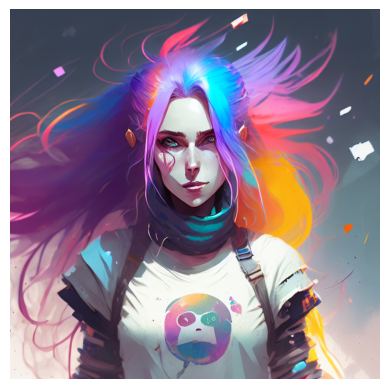

In [7]:
print("[PROMPT]:", prompt)
plt.imshow(image)
plt.axis('off')

In [8]:
prompt2 = """A girl sitting on a chair & she is accomapnied by her tiger. Make sure to keep it cinematic and color to be golden iris
"""
image = pipe(prompt2).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

[PROMPT]: A girl sitting on a chair & she is accomapnied by her tiger. Make sure to keep it cinematic and color to be golden iris



(-0.5, 639.5, 639.5, -0.5)

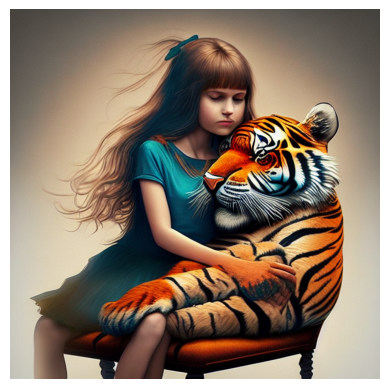

In [10]:
print("[PROMPT]:", prompt2)
plt.imshow(image)
plt.axis('off')

Working with stable diffusion parameters

  -  Negative prompting
  -  num_inference_steps
  -  height
  -  weight
  -  num_images_per_prompt

In [11]:
def generate_image(prompt, negative_prompt, num_inference_steps, height, width, num_images_per_prompt):
  img = pipe(prompt, **params).images

  num_images = len(img)
  if num_images > 1:
    fig, ax = plt.subplots(nrows=1, ncols=num_images)
    for i in range(num_images):
      ax[i].imshow(img[i])
      ax[i].set_axis_off()

  else:
    fig = plt.figure()
    plt.imshow(img[0]);
    plt.axis('off');
  plt.tight_layout()

  0%|          | 0/50 [00:00<?, ?it/s]

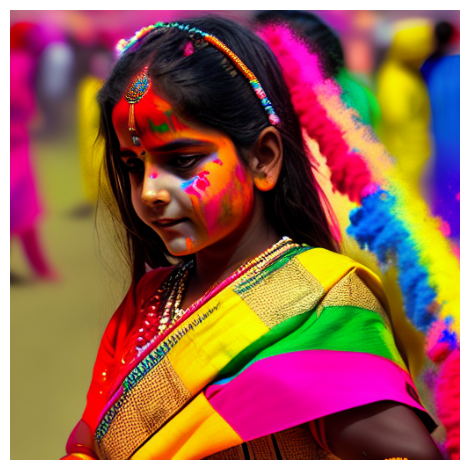

In [13]:
prompt = "dreamlike, beautiful girl playing the festival of colors, draped in traditional Indian attire, throwing colors on others"

# Define parameters for image generation including the missing arguments
params = {
    "negative_prompt": "", # Add negative prompt if needed
    "num_inference_steps": 50, # Add number of inference steps
    "height": 512,  # Add desired height
    "width": 512,   # Add desired width
    "num_images_per_prompt": 1 # Add number of images per prompt
}

# Call generate_image with all required arguments, removing 'pipe'
# as it's likely used within the function already.
generate_image(prompt, params["negative_prompt"], params["num_inference_steps"], params["height"], params["width"], params["num_images_per_prompt"])

  0%|          | 0/100 [00:00<?, ?it/s]

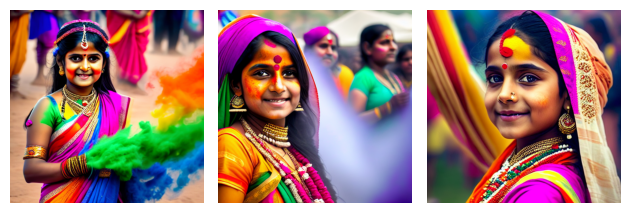

In [18]:
#num_inference_steps height and width num_images_per_prompt negative prompt
params = {
    'num_inference_steps': 100,
    "negative_prompt": "ugly, distorted, low quality", # Add negative prompt if needed
    "height": 512,  # Add desired height
    "width": 512,   # Add desired width
    "num_images_per_prompt": 3 # Add number of images per prompt
}  # Include all necessary parameters for image generation

# Call generate_image with all necessary arguments and use params['num_inference_steps']
generate_image(prompt, params["negative_prompt"], params['num_inference_steps'], params["height"], params["width"], params["num_images_per_prompt"])

In [ ]:
#negative prompt

